In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import matplotlib.font_manager as fm

경고: 시스템에서 한국어 폰트를 찾을 수 없습니다. 기본 폰트를 사용합니다.
PM2.5 데이터 분석 시작...
=== PM2.5 데이터 분석 ===
데이터 로드 중: rsm_total_pm25_conc_2sc.npy
데이터 로드 완료!

=== 데이터 기본 정보 ===
데이터 형태 (shape): (1, 4, 40, 24, 1, 82, 67)
데이터 타입: float32
데이터 크기: 21,096,960 개 요소
메모리 사용량: 80.48 MB

=== 데이터 통계 정보 ===
최솟값: 0.734594
최댓값: 281.525696
평균값: 11.001453
표준편차: 12.156813
중앙값: 6.352279

=== 차원별 정보 ===
차원 0 (시나리오): 1 - RSM 시나리오
차원 1 (계절): 4 - 계절별 데이터
차원 2 (일): 40 - 일별 데이터
차원 3 (시간): 24 - 시간별 데이터
차원 4 (높이): 1 - 고도 레벨
차원 5 (위도): 82 - 위도 격자
차원 6 (경도): 67 - 경도 격자

=== 데이터 시각화 ===


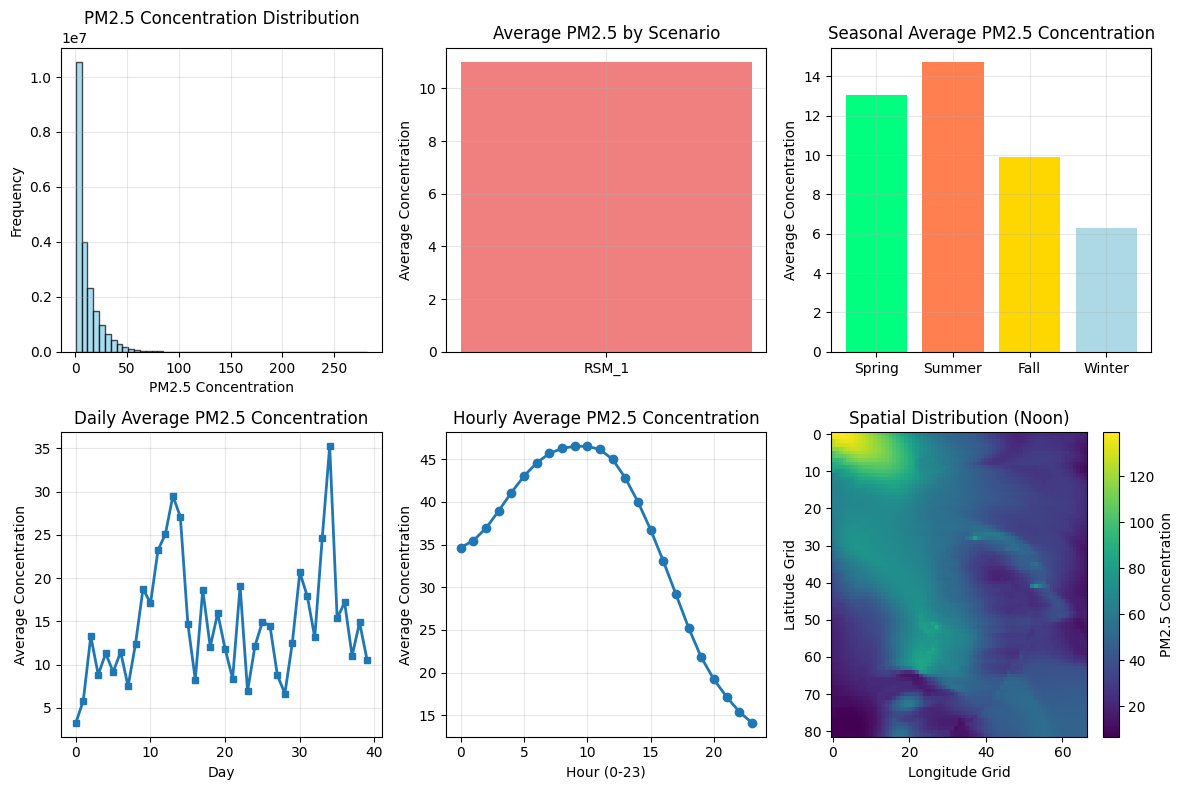

시각화 완료! 'pm25_analysis.png' 파일로 저장되었습니다.
이상치 개수: 1,330,030 (6.30%)
이상치 범위: < -15.066377 또는 > 32.718893
0값 개수: 0 (0.00%)

=== 차원별 통계 ===
시간별 평균 범위: 9.977427 ~ 12.096447
봄: 13.063091
여름: 14.737035
가을: 9.922713
겨울: 6.282961


In [42]:
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

# 폰트 경로 확인 및 설정
def setup_korean_font():
    """한국어 폰트를 설정합니다."""
    # 시스템에 설치된 폰트 중 한국어 폰트 찾기
    font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
    korean_fonts = []
    
    for font in font_list:
        try:
            if any(name in font.lower() for name in ['nanum', 'malgun', 'gulim', 'dotum', 'batang']):
                korean_fonts.append(font)
        except:
            continue
    
    if korean_fonts:
        # 첫 번째 한국어 폰트 사용
        font_path = korean_fonts[0]
        font_prop = fm.FontProperties(fname=font_path)
        plt.rcParams['font.family'] = font_prop.get_name()
        print(f"한국어 폰트 설정: {font_prop.get_name()}")
    else:
        # 한국어 폰트가 없으면 기본 폰트 사용하고 경고
        print("경고: 시스템에서 한국어 폰트를 찾을 수 없습니다. 기본 폰트를 사용합니다.")
        plt.rcParams['font.family'] = 'DejaVu Sans'

# 폰트 설정 실행
setup_korean_font()

def load_and_analyze_data(data_path):
    """npy 데이터를 로드하고 기본 정보를 출력합니다."""
    print("=== PM2.5 데이터 분석 ===")
    
    # 데이터 로드
    # data_path = "rsm_total_pm25_conc_2sc.npy"
    print(f"데이터 로드 중: {data_path}")
    
    try:
        data = np.load(data_path)
        print(f"데이터 로드 완료!")
        
        # 데이터 기본 정보 출력
        print(f"\n=== 데이터 기본 정보 ===")
        print(f"데이터 형태 (shape): {data.shape}")
        print(f"데이터 타입: {data.dtype}")
        print(f"데이터 크기: {data.size:,} 개 요소")
        print(f"메모리 사용량: {data.nbytes / (1024**2):.2f} MB")
        
        # 데이터 통계 정보
        print(f"\n=== 데이터 통계 정보 ===")
        print(f"최솟값: {np.min(data):.6f}")
        print(f"최댓값: {np.max(data):.6f}")
        print(f"평균값: {np.mean(data):.6f}")
        print(f"표준편차: {np.std(data):.6f}")
        print(f"중앙값: {np.median(data):.6f}")
        
        # 데이터 차원별 정보
        print(f"\n=== 차원별 정보 ===")
        print(f"차원 0 (시나리오): {data.shape[0]} - RSM 시나리오")
        print(f"차원 1 (계절): {data.shape[1]} - 계절별 데이터")
        print(f"차원 2 (일): {data.shape[2]} - 일별 데이터")
        print(f"차원 3 (시간): {data.shape[3]} - 시간별 데이터")
        print(f"차원 4 (높이): {data.shape[4]} - 고도 레벨")
        print(f"차원 5 (위도): {data.shape[5]} - 위도 격자")
        print(f"차원 6 (경도): {data.shape[6]} - 경도 격자")
        
        return data
        
    except FileNotFoundError:
        print(f"오류: {data_path} 파일을 찾을 수 없습니다.")
        return None
    except Exception as e:
        print(f"오류: {e}")
        return None

def visualize_data(data):
    """데이터를 시각화합니다."""
    if data is None:
        return
    
    print("\n=== 데이터 시각화 ===")
    
    # 1. 전체 데이터 분포 히스토그램
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 3, 1)
    plt.hist(data.flatten(), bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title('PM2.5 Concentration Distribution', fontsize=12)
    plt.xlabel('PM2.5 Concentration')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    
    # 2. 시나리오별 비교
    plt.subplot(2, 3, 2)
    scenario_mean = np.mean(data, axis=(1, 2, 3, 4, 5, 6))
    plt.bar(['RSM_1'], scenario_mean, color='lightcoral')
    plt.title('Average PM2.5 by Scenario', fontsize=12)
    plt.ylabel('Average Concentration')
    plt.grid(True, alpha=0.3)
    
    # 3. 계절별 평균 농도
    plt.subplot(2, 3, 3)
    seasonal_mean = np.mean(data, axis=(0, 2, 3, 4, 5, 6))
    seasons = ['Spring', 'Summer', 'Fall', 'Winter']
    plt.bar(seasons, seasonal_mean, color=['springgreen', 'coral', 'gold', 'lightblue'])
    plt.title('Seasonal Average PM2.5 Concentration', fontsize=12)
    plt.ylabel('Average Concentration')
    plt.grid(True, alpha=0.3)
    
    # 4. 일별 변화 (첫 번째 시나리오, 여름(1) 계절)
    plt.subplot(2, 3, 4)
    daily_mean = np.mean(data[0, 1, :, :, 0, :, :], axis=(1, 2, 3))
    plt.plot(daily_mean, marker='s', linewidth=2, markersize=4)
    plt.title('Daily Average PM2.5 Concentration', fontsize=12)
    plt.xlabel('Day')
    plt.ylabel('Average Concentration')
    plt.grid(True, alpha=0.3)

    # 5. 시간별 평균 농도 (첫 번째 시나리오, 여름(1) 계절, 35번째일))
    plt.subplot(2, 3, 5)
    hourly_mean = np.mean(data[0, 1, 34, :, 0, :, :], axis=(1, 2))
    plt.plot(hourly_mean, marker='o', linewidth=2, markersize=6)
    plt.title('Hourly Average PM2.5 Concentration', fontsize=12)
    plt.xlabel('Hour (0-23)')
    plt.ylabel('Average Concentration')
    plt.grid(True, alpha=0.3)

    # 6. 공간 분포 (첫 번째 시나리오, 여름(1) 계절, 첫 번째 일, 정오)
    plt.subplot(2, 3, 6)
    spatial_data = data[0, 1, 34, 9, 0, :, :]  # 정오 데이터
    im = plt.imshow(spatial_data, cmap='viridis', aspect='auto')
    plt.colorbar(im, label='PM2.5 Concentration')
    plt.title('Spatial Distribution (Noon)', fontsize=12)
    plt.xlabel('Longitude Grid')
    plt.ylabel('Latitude Grid')
    
    plt.tight_layout()
    plt.savefig('pm25_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("시각화 완료! 'pm25_analysis.png' 파일로 저장되었습니다.")

def detailed_analysis(data):
    """상세한 데이터 분석을 수행합니다."""
    if data is None:
        return
    
    # 이상치 탐지
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = np.sum((data < lower_bound) | (data > upper_bound))
    outlier_percentage = (outliers / data.size) * 100
    
    print(f"이상치 개수: {outliers:,} ({outlier_percentage:.2f}%)")
    print(f"이상치 범위: < {lower_bound:.6f} 또는 > {upper_bound:.6f}")
    
    # 0값 비율
    zero_count = np.sum(data == 0)
    zero_percentage = (zero_count / data.size) * 100
    print(f"0값 개수: {zero_count:,} ({zero_percentage:.2f}%)")
    
    # 각 차원별 통계
    print(f"\n=== 차원별 통계 ===")
    
    # 시간별 통계
    hourly_stats = np.mean(data, axis=(0, 1, 2, 4, 5, 6))
    print(f"시간별 평균 범위: {np.min(hourly_stats):.6f} ~ {np.max(hourly_stats):.6f}")
    
    # 계절별 통계
    seasonal_stats = np.mean(data, axis=(0, 2, 3, 4, 5, 6))
    seasons = ['봄', '여름', '가을', '겨울']
    for i, season in enumerate(seasons):
        print(f"{season}: {seasonal_stats[i]:.6f}")

def main():
    """메인 함수"""
    print("PM2.5 데이터 분석 시작...")
    
    data_path = "rsm_total_pm25_conc_2sc.npy"
    # 데이터 로드 및 기본 분석
    data = load_and_analyze_data(data_path)
    
    if data is not None:
        # 시각화
        visualize_data(data)
        
        # 상세 분석
        detailed_analysis(data)
    else:
        print("데이터 로드에 실패했습니다.")

if __name__ == "__main__":
    main() 

In [44]:
def main():
    """메인 함수"""
    print("PM2.5 데이터 분석 시작...")
    
    data_path = "/home/user/workdir/CMAQ_Emulator/ncf_dataset/season/season_1/RSM_1/CCTM_GUIDE_RSM_Linux2_x86_64mpif90.GUIDE.RSM.ACONC.2012357.npy"
    # 데이터 로드 및 기본 분석
    data = load_and_analyze_data(data_path)
    
    if data is not None:
        # 시각화
        visualize_data(data)
        
        # 상세 분석
        detailed_analysis(data)
    else:
        print("데이터 로드에 실패했습니다.")

if __name__ == "__main__":
    main() 

PM2.5 데이터 분석 시작...
=== PM2.5 데이터 분석 ===
데이터 로드 중: /home/user/workdir/CMAQ_Emulator/ncf_dataset/season/season_1/RSM_1/CCTM_GUIDE_RSM_Linux2_x86_64mpif90.GUIDE.RSM.ACONC.2012357.npy
데이터 로드 완료!

=== 데이터 기본 정보 ===
데이터 형태 (shape): (24, 5, 82, 67)
데이터 타입: float32
데이터 크기: 659,280 개 요소
메모리 사용량: 2.51 MB

=== 데이터 통계 정보 ===
최솟값: 0.000000
최댓값: 66.685371
평균값: 0.591011
표준편차: 0.912171
중앙값: 0.404027

=== 차원별 정보 ===
차원 0 (시나리오): 24 - RSM 시나리오
차원 1 (계절): 5 - 계절별 데이터
차원 2 (일): 82 - 일별 데이터
차원 3 (시간): 67 - 시간별 데이터
오류: tuple index out of range
데이터 로드에 실패했습니다.
